## Reshaping NWS Data, 2018 & 2019

Goal 1: Stack for time series analysis

Goal 2: Use critical temps in risk-adjustment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")

#import pmdarima as pm

In [2]:
weather_2018 = {}
weather_2018[1] = pd.read_csv("weather_data/2018/Jan2018.csv")
weather_2018[2] = pd.read_csv("weather_data/2018/Feb2018.csv")
weather_2018[3] = pd.read_csv("weather_data/2018/Mar2018.csv")
weather_2018[4] = pd.read_csv("weather_data/2018/Apr2018.csv")
weather_2018[5] = pd.read_csv("weather_data/2018/May2018.csv")
weather_2018[6] = pd.read_csv("weather_data/2018/Jun2018.csv")
weather_2018[7] = pd.read_csv("weather_data/2018/Jul2018.csv")
weather_2018[8] = pd.read_csv("weather_data/2018/Aug2018.csv")
weather_2018[9] = pd.read_csv("weather_data/2018/Sep2018.csv")
weather_2018[10] = pd.read_csv("weather_data/2018/Oct2018.csv")
weather_2018[11] = pd.read_csv("weather_data/2018/Nov2018.csv")
weather_2018[12] = pd.read_csv("weather_data/2018/Dec2018.csv")
weather1 = pd.concat(weather_2018, 0)

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/2018/Jan2018.csv'

In [3]:
weather1

Date Max  Min   Avg Departure HDD CDD Precipitation New Snow  \
1  0     1/1/2018  10   -4   3.0     -24.2  62   0             0        0   
   1     1/2/2018  17  -10   3.5     -23.5  61   0             0        0   
   2     1/3/2018  27    4  15.5     -11.3  49   0             0        0   
   3     1/4/2018  27    6  16.5     -10.2  48   0          0.33      9.3   
   4     1/5/2018  22    1  11.5     -15.0  53   0             T        T   
...           ...  ..  ...   ...       ...  ..  ..           ...      ...   
12 26  12/27/2018  34   24  29.0       0.7  36   0             0        0   
   27  12/28/2018  36   29  32.5       4.4  32   0           0.4      0.2   
   28  12/29/2018  49   26  37.5       9.6  27   0             0        0   
   29  12/30/2018  34   23  28.5       0.9  36   0             0        0   
   30  12/31/2018  41   27  34.0       6.6  31   0          0.31        T   

      Snow Depth  
1  0           5  
   1           5  
   2           5  
   3           5  
   4          15  
...          ...  
12 26          0  
   27          T  
   28          0  
   29          0  
   30          0  

[365 rows x 10 columns]

In [4]:
weather_2019 = {}
weather_2019[1] = pd.read_csv("weather_data/2019/Jan2019.csv")
weather_2019[2] = pd.read_csv("weather_data/2019/Feb2019.csv")
weather_2019[3] = pd.read_csv("weather_data/2019/Mar2019.csv")
weather_2019[4] = pd.read_csv("weather_data/2019/Apr2019.csv")
weather_2019[5] = pd.read_csv("weather_data/2019/May2019.csv")
weather_2019[6] = pd.read_csv("weather_data/2019/Jun2019.csv")
weather_2019[7] = pd.read_csv("weather_data/2019/Jul2019.csv")
weather_2019[8] = pd.read_csv("weather_data/2019/Aug2019.csv")
weather_2019[9] = pd.read_csv("weather_data/2019/Sep2019.csv")
weather_2019[10] = pd.read_csv("weather_data/2019/Oct2019.csv")
weather_2019[11] = pd.read_csv("weather_data/2019/Nov2019.csv")
weather_2019[12] = pd.read_csv("weather_data/2019/Dec2019.csv")
weather2 = pd.concat(weather_2019, 0)

In [5]:
weather2

Date   Max   Min   Avg  Departure   HDD  CDD Precipitation  \
1  0     1/1/2019  52.0  29.0  40.5       13.3  24.0  0.0          0.24   
   1     1/2/2019  34.0  23.0  28.5        1.5  36.0  0.0             0   
   2     1/3/2019  40.0  28.0  34.0        7.2  31.0  0.0          0.05   
   3     1/4/2019  45.0  33.0  39.0       12.3  26.0  0.0             0   
   4     1/5/2019  40.0  30.0  35.0        8.5  30.0  0.0          0.02   
...           ...   ...   ...   ...        ...   ...  ...           ...   
12 29  12/30/2019  34.0  27.0  30.5        2.9  34.0  0.0          0.93   
   30  12/31/2019  36.0  29.0  32.5        5.1  32.0  0.0          0.17   
   31         NaN   NaN   NaN   NaN        NaN   NaN  NaN           NaN   
   32         NaN   NaN   NaN   NaN        NaN   NaN  NaN           NaN   
   33         NaN   NaN   NaN   NaN        NaN   NaN  NaN           NaN   

      New Snow Snow Depth  
1  0         1          0  
   1         0          0  
   2       0.7          1  
   3         0          0  
   4         0          0  
...        ...        ...  
12 29      2.6          T  
   30      0.5          4  
   31      NaN        NaN  
   32      NaN        NaN  
   33      NaN        NaN  

[401 rows x 10 columns]

In [6]:
weather2 = weather2[~weather2["Date"].isnull()]
weather2

Date   Max   Min   Avg  Departure   HDD  CDD Precipitation  \
1  0     1/1/2019  52.0  29.0  40.5       13.3  24.0  0.0          0.24   
   1     1/2/2019  34.0  23.0  28.5        1.5  36.0  0.0             0   
   2     1/3/2019  40.0  28.0  34.0        7.2  31.0  0.0          0.05   
   3     1/4/2019  45.0  33.0  39.0       12.3  26.0  0.0             0   
   4     1/5/2019  40.0  30.0  35.0        8.5  30.0  0.0          0.02   
...           ...   ...   ...   ...        ...   ...  ...           ...   
12 26  12/27/2019  46.0  30.0  38.0        9.7  27.0  0.0             T   
   27  12/28/2019  48.0  28.0  38.0        9.9  27.0  0.0             0   
   28  12/29/2019  42.0  27.0  34.5        6.6  30.0  0.0          0.09   
   29  12/30/2019  34.0  27.0  30.5        2.9  34.0  0.0          0.93   
   30  12/31/2019  36.0  29.0  32.5        5.1  32.0  0.0          0.17   

      New Snow Snow Depth  
1  0         1          0  
   1         0          0  
   2       0.7          1  
   3         0          0  
   4         0          0  
...        ...        ...  
12 26        T          T  
   27        0          0  
   28        0          0  
   29      2.6          T  
   30      0.5          4  

[365 rows x 10 columns]

In [7]:
weather_all = pd.concat([weather1, weather2], ignore_index=True)
weather_all

,Date,Max,Min,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
0,1/1/2018,10,-4,3.0,-24.2,62,0,0,0,5
1,1/2/2018,17,-10,3.5,-23.5,61,0,0,0,5
2,1/3/2018,27,4,15.5,-11.3,49,0,0,0,5
3,1/4/2018,27,6,16.5,-10.2,48,0,0.33,9.3,5
4,1/5/2018,22,1,11.5,-15.0,53,0,T,T,15
...,...,...,...,...,...,...,...,...,...,...
725,12/27/2019,46.0,30.0,38.0,9.7,27.0,0.0,T,T,T
726,12/28/2019,48.0,28.0,38.0,9.9,27.0,0.0,0,0,0
727,12/29/2019,42.0,27.0,34.5,6.6,30.0,0.0,0.09,0,0
728,12/30/2019,34.0,27.0,30.5,2.9,34.0,0.0,0.93,2.6,T


In [8]:
weather_all[weather_all["Avg"]=="M"]

,Date,Max,Min,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
160,6/10/2018,81,M,M,M,M,M,0,M,M
194,7/14/2018,M,M,M,M,M,M,0.05,M,M
298,10/26/2018,M,32,M,M,M,M,0,M,M


In [9]:
weather_all.iloc[158:162, :]

,Date,Max,Min,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
158,6/8/2018,83,57,70,4.2,0,5,0,M,M
159,6/9/2018,83,57,70,3.8,0,5,0,M,M
160,6/10/2018,81,M,M,M,M,M,0,M,M
161,6/11/2018,73,56,64.5,-2.3,0,0,0,0,0


In [10]:
weather_all.at[160,"Avg"] = (70 + 64.5)/2

In [11]:
weather_all.iloc[193:196, :]

,Date,Max,Min,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
193,7/13/2018,92,57,74.5,0.4,0,10,0.0,M,M
194,7/14/2018,M,M,M,M,M,M,0.05,M,M
195,7/15/2018,85,65,75,0.8,0,10,0.02,M,M


In [12]:
weather_all.at[194,"Avg"] = (74.5 + 75)/2

In [13]:
weather_all.iloc[297:300, :]

,Date,Max,Min,Avg,Departure,HDD,CDD,Precipitation,New Snow,Snow Depth
297,10/25/2018,46,33,39.5,-9.4,25,0,0,M,M
298,10/26/2018,M,32,M,M,M,M,0,M,M
299,10/27/2018,42,38,40,-8.2,25,0,0.6,0,0


In [14]:
weather_all.at[298,"Avg"] = (39.5 + 40)/2

In [15]:
ts = weather_all.drop(columns=["Max", "Min", "Departure", "HDD", "CDD", "Precipitation", "New Snow", "Snow Depth"], axis=1)
ts = ts[ts["Avg"]!="M"]
ts.set_index("Date", inplace=True)
ts.index = pd.to_datetime(ts.index, format='%m/%d/%Y')
ts = ts['Avg'].astype('float64', copy=False)
ts.head(10)

Date
2018-01-01     3.0
2018-01-02     3.5
2018-01-03    15.5
2018-01-04    16.5
2018-01-05    11.5
2018-01-06     4.0
2018-01-07     5.0
2018-01-08    25.0
2018-01-09    33.0
2018-01-10    25.5
Name: Avg, dtype: float64

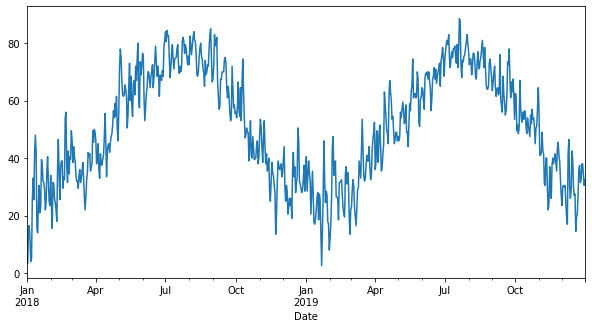

In [16]:
ts.plot(figsize = (10,5))
pyplot.show()

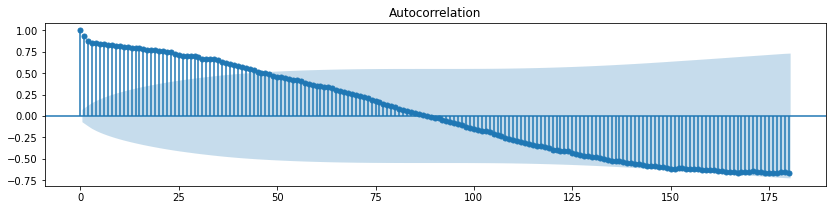

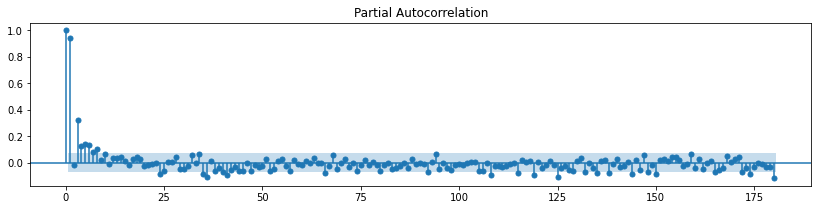

In [17]:
plt.rcParams["figure.figsize"] = [14,3]

# Plot for autocorrelation
sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=180)
plt.show()
# Plot for partial autocorrelation
sm.graphics.tsa.plot_pacf(ts.values.squeeze(), lags=180, method = 'ols')
plt.show()

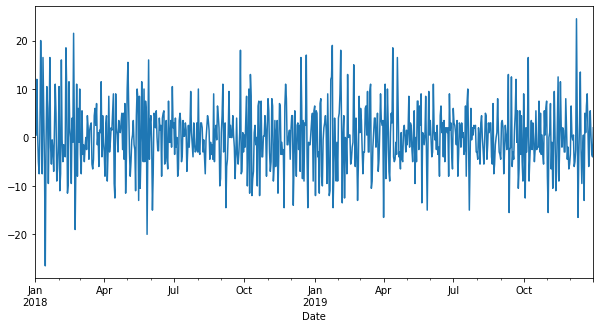

In [18]:
ts_diff = ts.diff(1)
ts_diff.plot(figsize = (10,5))
pyplot.show()

In [19]:
adf_test = adfuller(ts_diff.dropna())

print("ADF = " + str(adf_test[0]))
print("p-value = " +str(adf_test[1]))

ADF = -13.22668842736996
p-value = 9.769506474890426e-25


## Dickey-Fuller Test

Shows the data is now stationary after 1 diff.

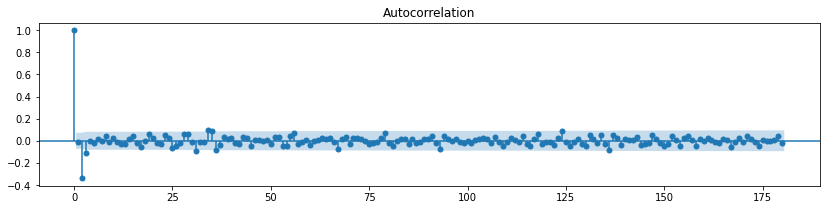

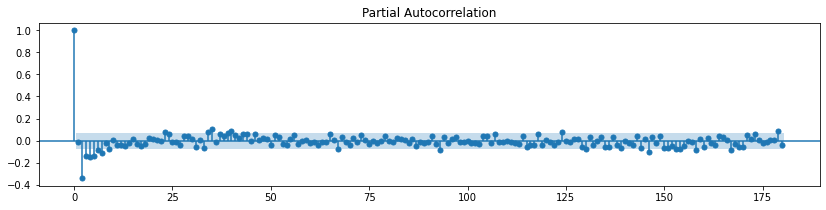

In [20]:
# Plot for autocorrelation
ts_diff = ts_diff.dropna()
sm.graphics.tsa.plot_acf(ts_diff.values.squeeze(), lags=180)
plt.show()
# Plot for partial autocorrelation
sm.graphics.tsa.plot_pacf(ts_diff.values.squeeze(), lags=180, method = 'ols')
plt.show()

In [21]:
X = ts.astype(np.float64)
train, test = X[:len(X)-int(0.5*len(X))], X[len(X)-int(0.5*len(X)):]

In [35]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=4,
                             start_P=0, max_P=3,
                             start_Q=0, max_Q=3,
                             seasonal=True,
                             d=1, D=0,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  365
Model:             SARIMAX(3, 1, 1)x(1, 0, [], 4)   Log Likelihood               -1172.947
Date:                            Mon, 13 Sep 2021   AIC                           2357.895
Time:                                    22:43:41   BIC                           2381.278
Sample:                                         0   HQIC                          2367.189
                                            - 365                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8305      0.090     -9.183      0.000      -1.008      -0.653
ar.L2         -0.5502      0.057     -9.586      0.000      -0.663      -0.438
ar.L3         -0.5190      0.053     -9.722      0.000      -0.624      -0.414
ma.L1          0.6971      0.100      7.002      0.000       0.502       0.892
ar.S.L4       -0.3404      0.057     -6.016      0.000      -0.451      -0.229
sigma2        36.7812      2.338     15.729      0.000      32.198      41.365
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.29
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.32
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

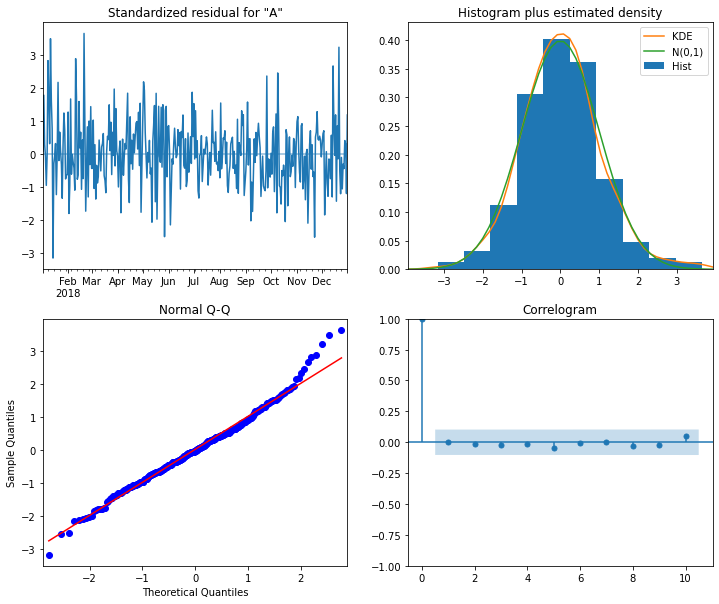

In [41]:
model = SARIMAX(train, order=(3, 1, 1), seasonal_order=(1, 0, 0, 4))
model_fitted = model.fit()
model_fitted.plot_diagnostics(figsize = (12,10))
plt.show()

In [42]:
print(model_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                Avg   No. Observations:                  365
Model:             SARIMAX(3, 1, 1)x(1, 0, [], 4)   Log Likelihood               -1172.947
Date:                            Mon, 13 Sep 2021   AIC                           2357.895
Time:                                    22:45:00   BIC                           2381.278
Sample:                                01-01-2018   HQIC                          2367.189
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8305      0.090     -9.183      0.000      -1.008      -0.653
ar.L2         -0.5502      0.057   

## Ljung-Box Test

The model's residuals are white noise.

In [43]:
predictions = model_fitted.predict(
    start=len(train)-1, end=len(X)-1, dynamic=False)

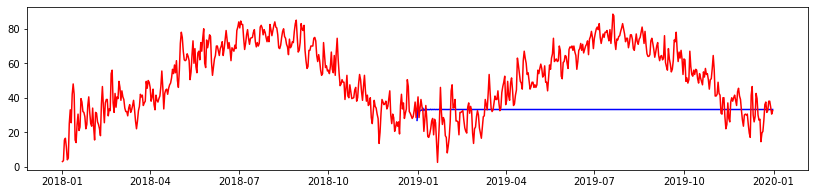

In [44]:
plt.plot(predictions, 'b')
plt.plot(ts, 'r')
plt.show()

Predictions not very good (obv).